
This script is used to compare the tds.run() and tds.itm_step() functions of andes. 

## Imports

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

# Move one level higher
sys.path.append(str(Path.cwd().parents[0]))
import andes as ad
from andes.routines.tds import TDS

# Set plotter use
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Setup system

NOTE: Be carfeul becuase it needs to be re-executed when jumping from tds.run() to tds.itm_step() or opposite direction.

In [2]:
# Load system
system = ad.load(ad.get_case("ieee39/ieee39_full.xlsx"))
system.files.no_output = True
system.PFlow.run()

# TDS setup
tds = TDS(system)
tds.config.fixt = 1
tds.config.shrinkt = 0
tds.config.tstep = 0.01
tds.config.tf = 1.0
tds.t = 0.0
tds.init()

# Logging
time_history = []
omega_history = [[] for _ in range(len(system.GENROU))]

system.GENROU.tm0.v[0] = 0.5  # increase Pm of first generator

GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_1  | 0.012  | 0.001
 GENROU_2  | 0.042  | 0.036
 GENROU_3  | 0.036  | 0.003
 GENROU_4  | 0.025  | 0.001
 GENROU_5  | 0.050  | 0.001
 GENROU_7  | 0.031  | 0.002
 GENROU_8  | 0.029  | 0.006
 GENROU_9  | 0.018  | 0.001
 GENROU_10 | 0.003  | 0.000




## tds.itm_step() 

Simulation finished.


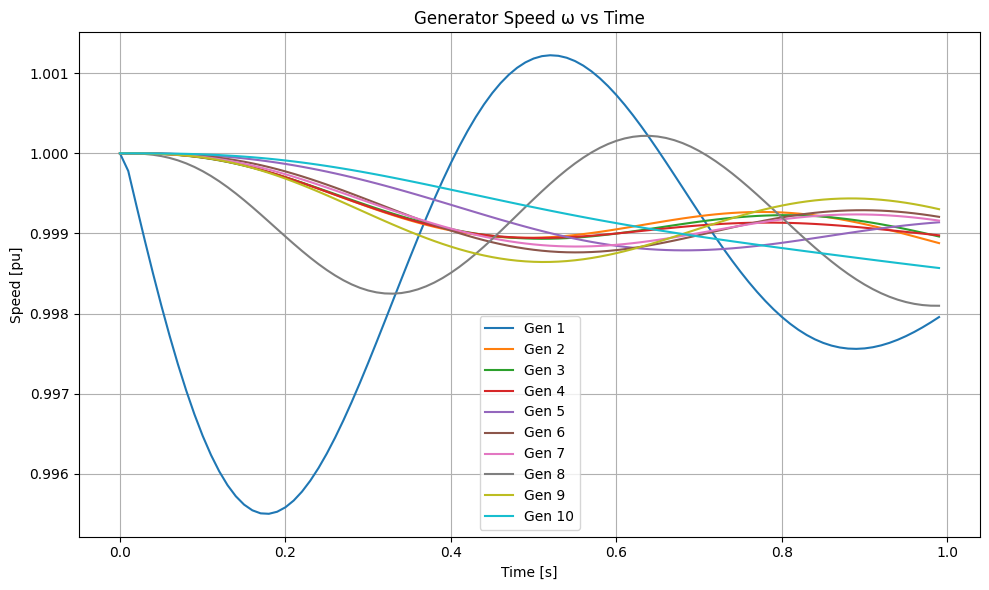

Plot saved to tests/test_plots/test_tds_step_omega.png


In [ ]:
###################### TDS_step test ######################
# Step-by-step simulation
while tds.t < tds.config.tf:

    # Log current state
    time_history.append(tds.t)
    for i in range(len(system.GENROU)):
        omega_history[i].append(system.GENROU.omega.v[i])

    # Advance one time step
    tds.itm_step()
    tds.t += tds.config.tstep

print("Simulation finished.")

# Plot
plt.figure(figsize=(10, 6))
for i, omega in enumerate(omega_history):
    plt.plot(time_history, omega, label=f'Gen {i+1}')
plt.xlabel("Time [s]")
plt.ylabel("Speed [pu]")
plt.title("Generator Speed ω vs Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## tds.run()

  0%|          | 0/100 [00:00<?, ?%/s]

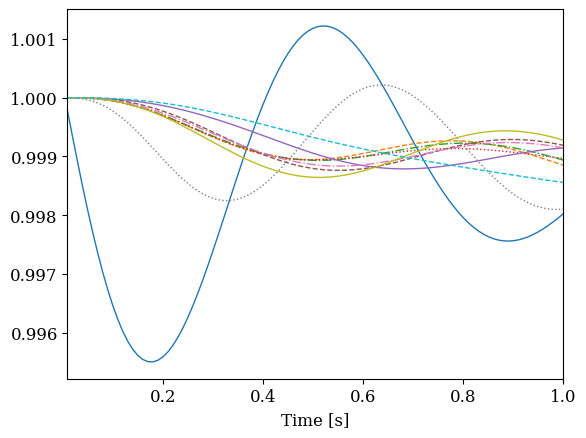

Plot saved to tests/test_plots/test_tds_omega.png


In [3]:
###################### TDS test ######################
tds.run()
system.TDS.load_plotter()
fig, ax = system.TDS.plt.plot(system.GENROU.omega)
print("Plot saved to tests/test_plots/test_tds_omega.png")